In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn.model_selection import LeaveOneOut
import matplotlib
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


## Wine data

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.1)

max_depth = 1 --> train_accuracy: 0.5625
max_depth = 1 --> valid_accuracy: 0.8125
max_depth = 1 --> test_accuracy: 0.5
max_depth = 3 --> train_accuracy: 0.75
max_depth = 3 --> valid_accuracy : 1.0
max_depth = 3 --> test_accuracy: 0.8333333333333334


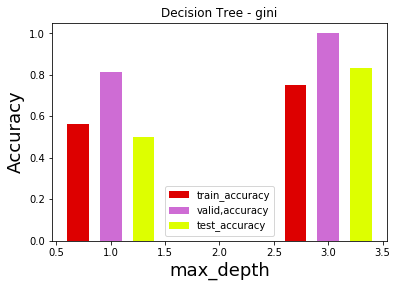

In [7]:
x_train1,x_valid,y_train1,y_valid=train_test_split(x_train,y_train,test_size=0.1)

x=[1,3]

# max_depth =1 
wine_tree=DecisionTreeClassifier(criterion='gini',max_depth=1,random_state=100)
wine_tree.fit(x_train1,y_train1)
wine_tree.fit(x_valid,y_valid)
wine_tree.predict(x_test)

train_accuracy=wine_tree.score(x_train1,y_train1)
valid_accuracy=wine_tree.score(x_valid,y_valid)
test_accuracy=wine_tree.score(x_test,y_test)

plt.bar(x[0]-0.3,train_accuracy,width=0.2,color='#dd0000')
plt.bar(x[0],valid_accuracy,width=0.2,color='#ce6cd4')
plt.bar(x[0]+0.3,test_accuracy,width=0.2,color='#ddff00')

print("max_depth = 1 --> train_accuracy:",train_accuracy)
print("max_depth = 1 --> valid_accuracy:",valid_accuracy)
print("max_depth = 1 --> test_accuracy:",test_accuracy)

# max_depth =3

wine_tree=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=100)
wine_tree.fit(x_train1,y_train1)
wine_tree.fit(x_valid,y_valid)
wine_tree.predict(x_test)

train_accuracy=wine_tree.score(x_train1,y_train1)
valid_accuracy=wine_tree.score(x_valid,y_valid)
test_accuracy=wine_tree.score(x_test,y_test)

plt.bar(x[1]-0.3,train_accuracy,width=0.2,color='#dd0000')
plt.bar(x[1],valid_accuracy,width=0.2,color='#ce6cd4')
plt.bar(x[1]+0.3,test_accuracy,width=0.2,color='#ddff00')

print("max_depth = 3 --> train_accuracy:",train_accuracy)
print("max_depth = 3 --> valid_accuracy :",valid_accuracy)
print("max_depth = 3 --> test_accuracy:",test_accuracy)

plt.title('Decision Tree - gini')
plt.legend(['train_accuracy','valid,accuracy','test_accuracy'],loc='lower center')

plt.xlabel('max_depth',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.show()


max_depth =1 --> test_accuracy: 0.6666666666666666
max_depth =1 --> kfold.mean :  0.61875
max_depth =1 --> loo.mean :  0.60625
max_depth =3 --> test_accuracy: 0.9444444444444444
max_depth =3 --> kfold.mean :  0.9125
max_depth =3 --> loo.mean :  0.93125


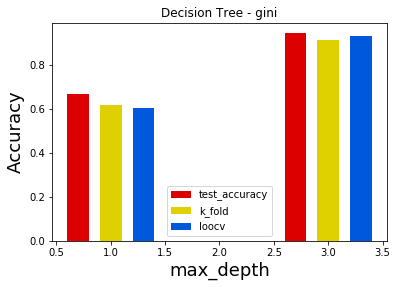

In [9]:

x=[1,3]
# max_depth =1 
wine_tree=DecisionTreeClassifier(criterion='gini',max_depth=1,random_state=100)
wine_tree.fit(x_train,y_train)
wine_tree.predict(x_test)

test_accuracy=wine_tree.score(x_test,y_test)
score_kfold=cross_val_score(wine_tree,x_train,y_train,cv=10)
loo=LeaveOneOut()
score_loo=cross_val_score(wine_tree,x_train,y_train,cv=loo)

plt.bar(x[0]-0.3,test_accuracy,width=0.2,color='#dd0000')
plt.bar(x[0],score_kfold.mean(),width=0.2,color='#dfd000')
plt.bar(x[0]+0.3,score_loo.mean(),width=0.2,color='#0058dd')

print("max_depth =1 --> test_accuracy:",test_accuracy)
print("max_depth =1 --> kfold.mean : ",score_kfold.mean())
print("max_depth =1 --> loo.mean : ",score_loo.mean())


# max_depth =3

wine_tree=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=100)
wine_tree.fit(x_train,y_train)
wine_tree.predict(x_test)

test_accuracy=wine_tree.score(x_test,y_test)
score_kfold=cross_val_score(wine_tree,x_train,y_train,cv=10)
loo=LeaveOneOut()
score_loo=cross_val_score(wine_tree,x_train,y_train,cv=loo)

plt.bar(x[1]-0.3,test_accuracy,width=0.2,color='#dd0000')
plt.bar(x[1],score_kfold.mean(),width=0.2,color='#dfd000')
plt.bar(x[1]+0.3,score_loo.mean(),width=0.2,color='#0058dd')

print("max_depth =3 --> test_accuracy:",test_accuracy)
print("max_depth =3 --> kfold.mean : ",score_kfold.mean())
print("max_depth =3 --> loo.mean : ",score_loo.mean())

plt.title('Decision Tree - gini')
plt.legend(['test_accuracy','k_fold','loocv'],loc='lower center')

plt.xlabel('max_depth',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.show()
